<h2 align="right">Case Study 3</h2> 
<h1 align="center">Case Study on Correlation and Regression </h1><br/>
<h2>Objectives :</h2><br>
A textile company regularly spent money on five advertising companies for their 
ads. (Dataset : Add_sales_data_2018.csv) 

<ol>
<li>First of all, check whether there is any relationship between the amount 
spent for advertising through five different companies and profit 
generated.  </li>
<li>Build a regression model to predict the profit from the given data and 
comment your findings on it. </li>
<li> Predict the profit generated by the company, if they wish to spend the 
following amount for advertisement. 
</li>
</ol>

| <!-- -->           | <!-- --> |
 |------------------- | ----|
 | Add1(in Thousands) | 290 |
 | Add2(in Thousands) | 312 |
 | Add3(in Thousands) | 309 |
 | Add4(in Thousands) | 298 |
 | Add5(in Thousands) | 320 |

In [131]:
%%HTML
<style type="text/css">
    table.dataframe td, table.dataframe th {
        border-style: inset;
    table {float:left}
    }
</style>

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

In [133]:
#read dataset to pandas dataframe
df = pd.read_csv('Add_sales_data_2018.csv')
df.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [134]:
df.shape

(205, 7)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [136]:
df.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

In [137]:
df.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


# 1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

<AxesSubplot:>

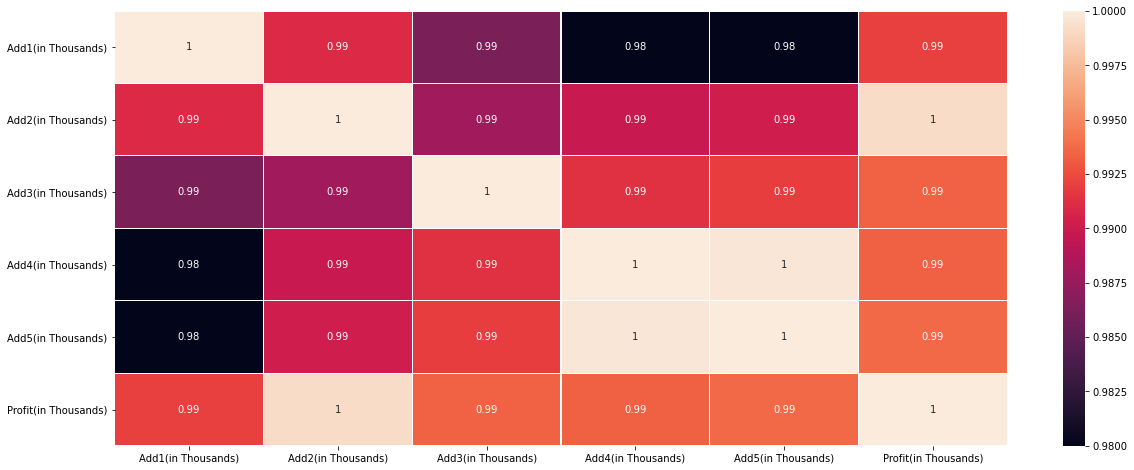

In [138]:
corrmatrix = df.corr()
plt.subplots(figsize = (20,8))
sns.heatmap(corrmatrix, vmin = .980, vmax = 1.000, annot = True, linewidth = 0.2)

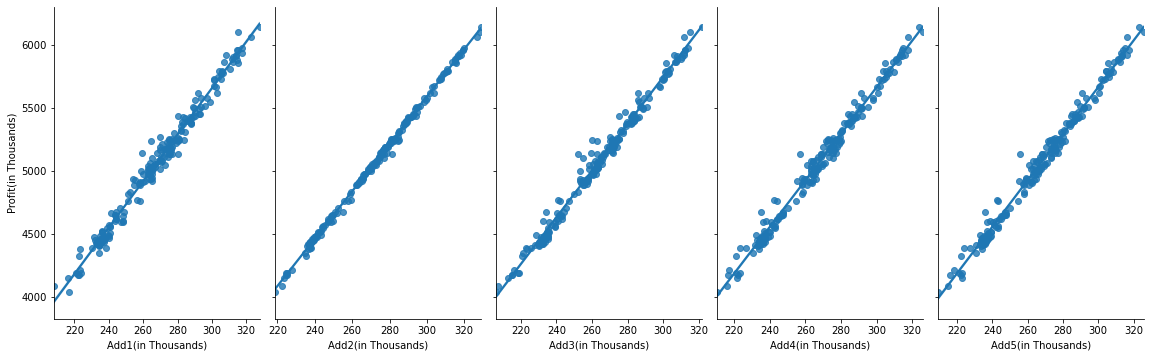

In [139]:
# visualize the relationship between the features and the response using scatterplots
# this produces pairs of scatterplot as shown
# use aspect= to control the size of the graphs
# use kind='reg' to plot linear regression on the graph
sns.pairplot(df, x_vars=['Add1(in Thousands)', 'Add2(in Thousands)', 'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)'], y_vars='Profit(in Thousands)', height=5, aspect=0.65, kind='reg')

In [140]:
from sklearn.linear_model import LinearRegression

In [141]:
predictors = ['Add1(in Thousands)', 'Add2(in Thousands)', 'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)']
X1 = df[predictors]
y1 = df['Profit(in Thousands)']

In [142]:
# Initialise and fit model
lr = LinearRegression()
model1 = lr.fit(X1, y1)

In [143]:
print(f'alpha = {model1.intercept_}')
print(f'betas = {model1.coef_}')

alpha = 1.8189894035458565e-12
betas = [ 1.   12.38  3.5   1.    0.9 ]


#### Therefore, our model can be written as:
### <font color='blue'>Profit = 1.819 + 1 * Add1 + 12.38 * Add2 + 3.5 * Add3 + 1 * Add4 + 0.9 * Add5. </font>
Hence we found a relationship between the the amount spent for advertising through the five companies and the profit generated.

#### INSIGHTS<br/>
<li>There is a <b>strong positive relationship</b> between each of ADD1,ADD2,ADD3,ADD4,ADD5 and Profit.</li>
<li>Also the relationship between amount spend at each of the five advertising companies and the profit generated is <b>linear.</b></li>
<li>We now have the  linear equation for our model:
    <i><b>Profit = 1.819 + 1 * Add1 + 12.38 * Add2 + 3.5 * Add3 + 1 * Add4 + 0.9 * Add5.</b></i></li>

<br/>

# 2. Build a regression model to predict the profit from the given data and comment your findings on it.

In [144]:
y = df['Profit(in Thousands)']
X = df.drop(['Profit(in Thousands)','Date'],axis=1)

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.25)

In [146]:
model = lr.fit(X_train, y_train)

In [147]:
predictions = model.predict(X_test)
print(y_test)

15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
95     4623.793
159    5384.175
162    5328.025
147    5175.051
182    5956.323
191    5780.799
164    4997.719
65     5075.858
175    5784.540
73     4936.120
152    5065.652
18     4190.965
82     5034.726
86     5015.536
143    5134.657
60     5145.131
101    5421.940
98     4569.293
30     4598.292
25     4436.321
16     4175.677
168    5616.791
195    5667.250
97     4648.834
194    5717.838
67     5001.615
120    5182.368
154    5017.503
202    5545.013
79     5013.207
69     5030.451
145    5108.626
55     4760.877
45     4606.340
84     4925.861
146    5250.788
66     5038.222
111    5491.792
153    5019.997
96     4647.356
38     4486.380
24     4435.174
139    5300.437
112    5425.190
29     4482.183
19     4193.095
178    6062.457
Name: Profit(in Thousands), dtype: float64


In [148]:
print(predictions)

[4152.066 4446.441 5131.898 4907.56  5004.282 4623.793 5384.175 5328.025
 5175.051 5956.323 5780.799 4997.719 5075.858 5784.54  4936.12  5065.652
 4190.965 5034.726 5015.536 5134.657 5145.131 5421.94  4569.293 4598.292
 4436.321 4175.677 5616.791 5667.25  4648.834 5717.838 5001.615 5182.368
 5017.503 5545.013 5013.207 5030.451 5108.626 4760.877 4606.34  4925.861
 5250.788 5038.222 5491.792 5019.997 4647.356 4486.38  4435.174 5300.437
 5425.19  4482.183 4193.095 6062.457]


In [149]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, predictions))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, predictions))

Coefficients: [ 1.   12.38  3.5   1.    0.9 ]
Intercept: 0.0
Mean squared error (MSE): 0.00
Coefficient of determination (R^2): 1.00


<b>INSIGHTS</b><br/>
<li>A Coefficient of determination (R^2) of 1.00 indicates that the regression predictions perfectly fit the data.</li>
<li>An MSE of zero (0.00) represents the fact that the predictor is a perfect predictor.</li>
<h3>We can see that the accuracy score is 1.00, it means we can use this model to solve multiple linear regression, and mean squared error rate is also very low( 0.00).<h3><br/><br/><br/>

# 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.

| <!-- -->           | <!-- --> |
 |------------------- | ----|
 | Add1(in Thousands) | 290 |
 | Add2(in Thousands) | 312 |
 | Add3(in Thousands) | 309 |
 | Add4(in Thousands) | 298 |
 | Add5(in Thousands) | 320 |

In [150]:
#assingning our new test set with given values:
new_X = [[290, 312, 309, 298, 320]]
#Now predict profit using our model:
print(model.predict(new_X))

[5820.06]


##### So according to our model, if the company spend advertisement amounts of 290 at add1, 312 at add2, 309 at add3, 298 at add4 and 320 at add5 then  the profit generated by the company will be <b> 5820.06</b>(in thousands).<br/><br/>